In [1]:
import pandas as pd 
from rdkit import Chem
from path import Path

import sys
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
parent_parent_dir = os.path.dirname(parent_dir)

sys.path.append(parent_dir)
sys.path.append(parent_parent_dir)

from metrics_batch_created import calculate_uniqueness, calculate_novelty, calculate_validity, plot_molecule_sizes, plot_atom_distribution_dict, calculate_scores, plot_scores
from DataPipeline.preprocessing import smiles_to_torch_geometric, torch_geometric_to_networkx, plot_graph

In [2]:
polymers_path = 'all_polymers.txt'
polymers_df = pd.read_csv(polymers_path, header=None)

mol_path = Path('generated_molecules_1000_polymers_kekulized.csv')
mol_df = pd.read_csv(mol_path)


In [14]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG

def plot_molecules(df, num_mols=5):
    mols = [Chem.MolFromSmiles(smiles) for smiles in df.iloc[:,0].head(num_mols)]
    return Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), useSVG=True)

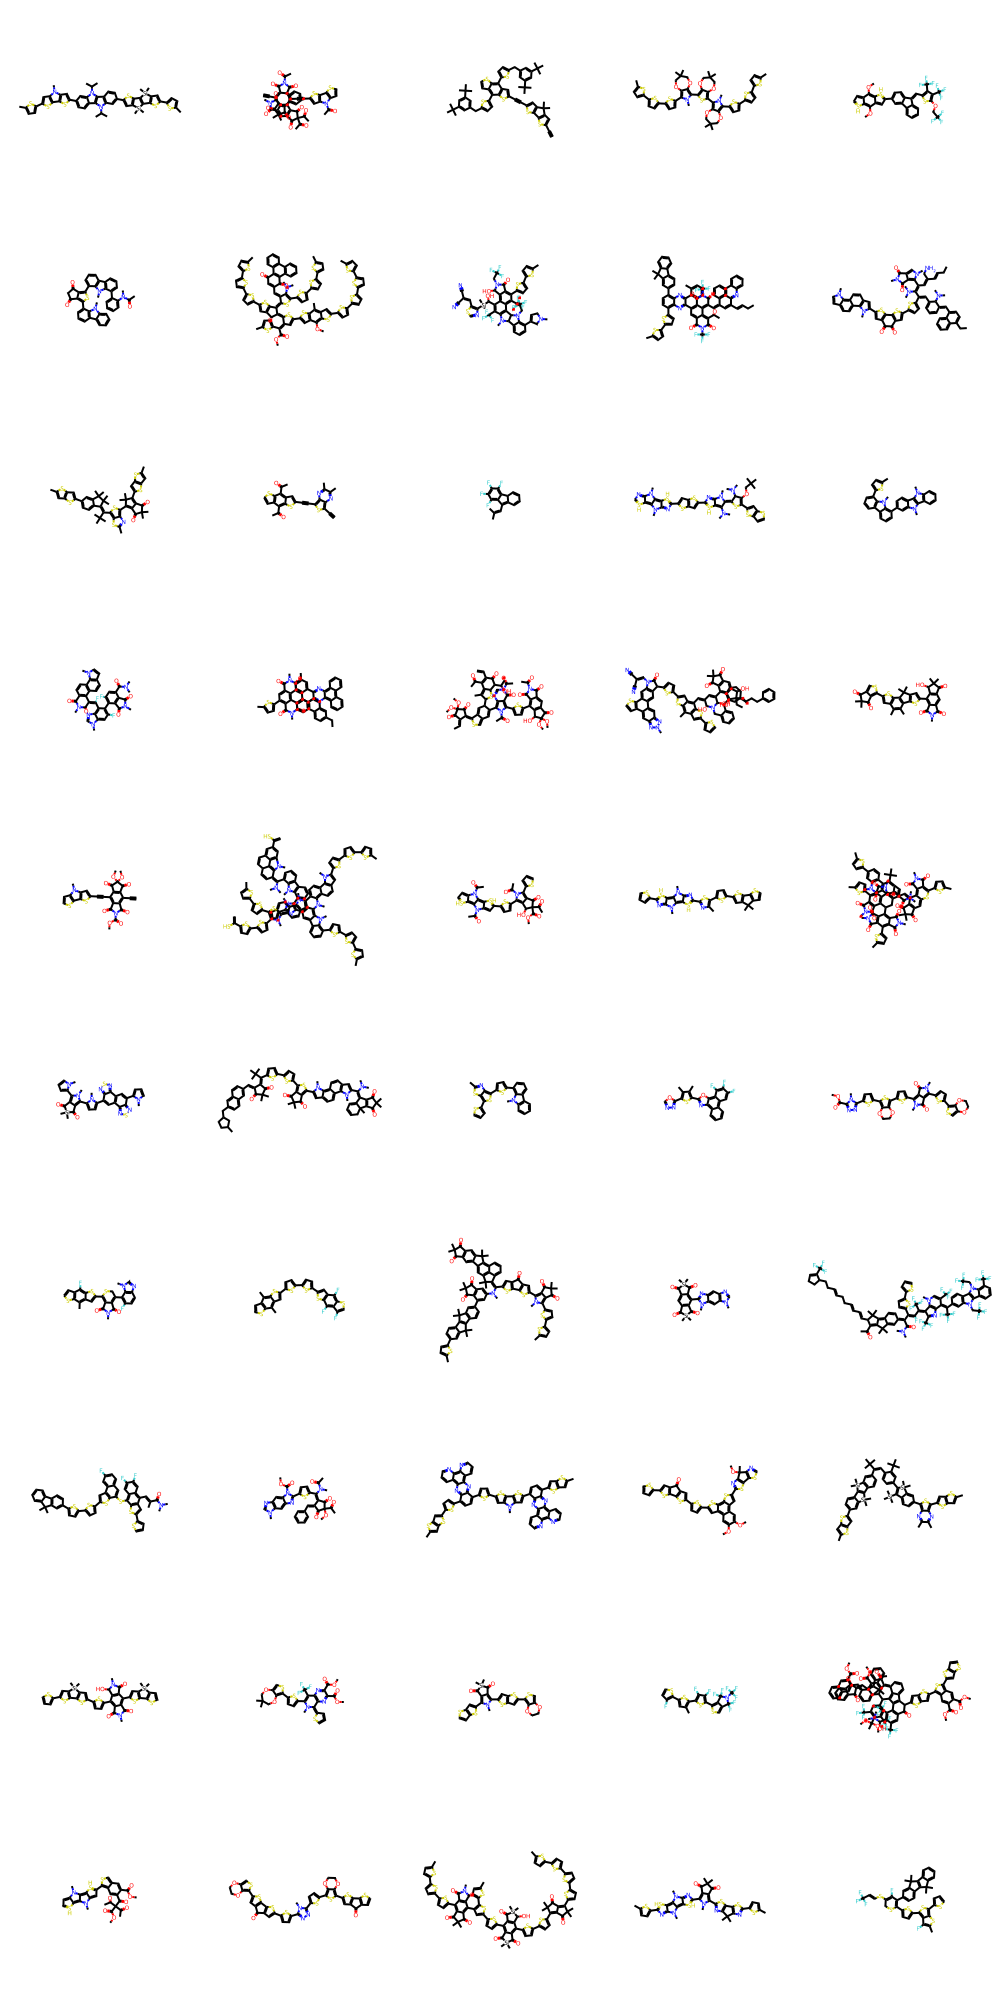

In [16]:
plot_molecules(mol_df, num_mols=50)

In [13]:
polymers_df

,0
0,CN1C(=O)c2cc3c(cc2C1=O)c1cc(-c2ccc(-c4ccc5c(c4...
1,CN1C(=O)c2csc(-c3sc4c(OCC(F)(F)F)c5c(F)csc5c(O...
2,Cc1sc(C)c2c3cc(-c4cc5sc(-c6cc7c(=O)n(CF)c(=O)c...
3,Cc1c2cc(-c3c4c(cn3C)C(=O)C(C)(C)C4=O)sc2c(C)c2...
4,C#Cc1c2c(c(C#Cc3nc4cc5nc(C#Cc6c7c(cc8c6C(=O)[S...
...,...
86968,CCC1(CC)C(=O)c2csc(-c3cc(C(F)(F)F)c4c(c3)n(CF)...
86969,CCC1(CC)C(=O)c2c(-c3cccs3)sc(-c3ccc(-c4cc5c(OC...
86970,CC1(C)COc2csc(-c3sc4c(CF)c(CF)c5scc(F)c5c4c3F)...
86971,Cc1ccc(-c2ccc(-c3ccc(-c4sc(-c5ccc6c(c5)c5cc(-c...


In [4]:
mol_list = mol_df['SMILES'].to_list()

In [18]:
def convert_canonical_smiles(smiles):
    # remove stereochemistry
    mol = Chem.MolFromSmiles(smiles)
    Chem.RemoveStereochemistry(mol)
    return Chem.MolToSmiles(mol)

polymers_df['SMILES'] = polymers_df.iloc[:,0].apply(convert_canonical_smiles)

In [19]:
validity, valid_molecules = calculate_validity(mol_list)

[13:12:22] Explicit valence for atom # 5 N, 4, is greater than permitted
[13:12:22] Explicit valence for atom # 4 C, 5, is greater than permitted


In [20]:
# Non valid molecules

non_valid_molecules = [mol for mol in mol_list if mol not in valid_molecules]

In [21]:
validity

0.998

In [22]:
uniqueness, unique_molecules = calculate_uniqueness(valid_molecules)

In [23]:
uniqueness

0.998997995991984

In [24]:
unique_molecules_canonical = [convert_canonical_smiles(mol) for mol in unique_molecules]

In [25]:
novelty, non_new_mols = calculate_novelty(unique_molecules_canonical, polymers_df['SMILES'].to_list())

100%|██████████| 997/997 [00:01<00:00, 717.19it/s]


In [29]:
non_new_mols

['COC(=O)n1c(=O)c2cc3c(=O)n(C(C)=O)c(=O)c3c(-c3cc4c(s3)c3sccc3n4C(C)=O)c2c1=O',
 'Cn1c(-c2cccs2)c2c(c1-c1ccc(-c3cc4c(s3)C3=C(c5sccc5[Si]3(C)C)[Si]4(C)C)s1)OCC(C)(C)CO2',
 'CNc1ccc2cc(NCc3sc(CNc4ccc5cc(NC)ccc5c4)c4oc(C(C)=O)nc34)ccc2c1',
 'C[Si]1(C)C2=C(c3ccccc31)[Si](C)(C)c1cc(-c3ccc(-c4cc5c(s4)C(=O)c4cc(-c6cccs6)sc4C5=O)s3)ccc12',
 'Cc1ccc(-c2sc(-c3sc(-c4sc(-c5ccc(C)s5)c5c(C)c(C)sc45)c4c3OCC(C)(C)CO4)c3c(C)c(C)sc23)s1',
 'COC(=O)C1(OC)c2ccccc2-c2ccc(-c3ccc(-c4cc5c(cc(-c6cccs6)c6nsnc65)c5nsnc45)s3)cc21',
 'Cn1c2ncsc2c2sc(-c3cc4c(s3)-c3sccc3[Si]4(C)C)nc21',
 'Cn1c(-c2cc3c(s2)c2sccc2n3C)c2c(c1-c1cc3c(s1)c1sccc1n3C)C(=O)[Si](C)(C)C2=O',
 'COc1cc2sc(-c3cc4c(s3)C3=C(c5sc(C#Cc6c7c(=O)n(C)c(=O)c7c(C#Cc7cc8c(s7)C7=C(c9sc(-c%10cc%11sc(OC)cc%11s%10)cc9[Si]7(C)C)[Si]8(C)C)c7c(=O)n(C)c(=O)c67)cc5[Si]3(C)C)[Si]4(C)C)cc2s1',
 'Cn1cnc2cc3nc(-c4ccc(-c5cc6c7c(c8cc(-c9ccc(-c%10nc%11cc%12nc(-c%13cccs%13)n(C)c%12cc%11n%10C)s9)sc8c6s5)C(=O)CC7=O)s4)n(C)c3cc21',
 'Cc1cc2c(-c3sc4c5scc(F)c5n(C)c4c3F)scc2s1',


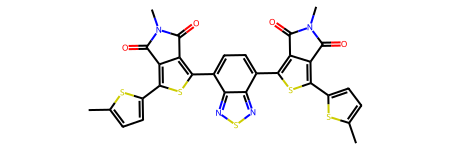

In [41]:
Chem.MolFromSmiles(non_new_mols[80])

In [24]:
novelty

0.7783350050150452

In [25]:
scores = calculate_scores(valid_molecules)

In [26]:
scores_polymers = calculate_scores(polymers_df['SMILES'].to_list())

In [28]:
# Save scores zinc in a csv file

df_zinc = pd.DataFrame(scores_polymers, columns=['QED_score'])
df_zinc.to_csv('scores_polymers.csv', index=False)

In [31]:
# Load Zinc scores

scores_zinc_path = Path('scores_polymers.csv')
scores_df_polymers = pd.read_csv(scores_zinc_path)

In [33]:
scores_polymers = scores_df_polymers['QED_score'].to_list()

In [ ]:
import numpy as np
from scipy.stats import entropy

def calculate_kl_divergence(list1, list2, bins=50):
    # Create histograms
    hist1, _ = np.histogram(list1, bins=bins, density=True)
    hist2, _ = np.histogram(list2, bins=bins, density=True)

    # Avoid division by zero
    hist1 += 1e-8
    hist2 += 1e-8

    # Compute KL divergence
    kl_div = entropy(hist1, hist2)

    return kl_div


In [ ]:
def calculate_js_divergence(list1, list2, bins=2000):
    # Create histograms
    hist1, _ = np.histogram(list1, bins=bins, density=True)
    hist2, _ = np.histogram(list2, bins=bins, density=True)

    # Avoid division by zero
    hist1 += 1e-8
    hist2 += 1e-8

    # Compute mixed distribution
    mix = (hist1 + hist2) / 2

    # Compute JS divergence
    js_div = (entropy(hist1, mix) + entropy(hist2, mix)) / 2

    return js_div

In [ ]:
calculate_kl_divergence(scores, scores_zinc)

0.00537276669846026

In [ ]:
calculate_kl_divergence(scores_zinc, scores)

0.004083586583555253

In [ ]:
calculate_js_divergence(scores, scores_zinc)

0.12025943762070967

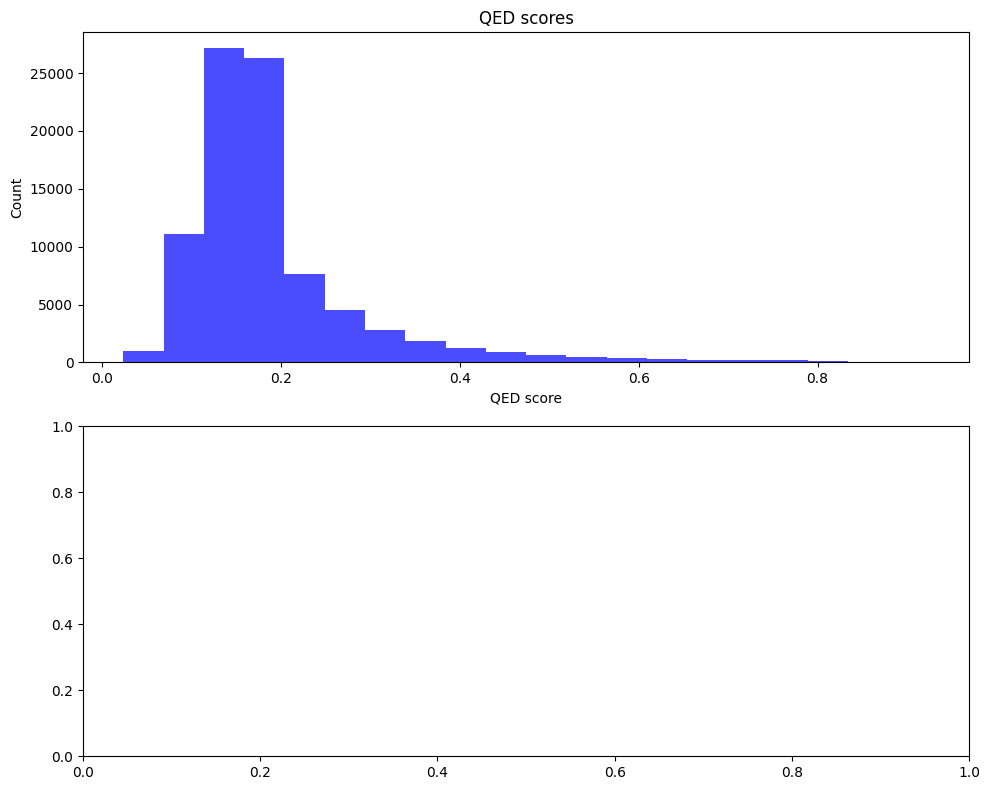

In [35]:
plot_scores(scores_polymers)

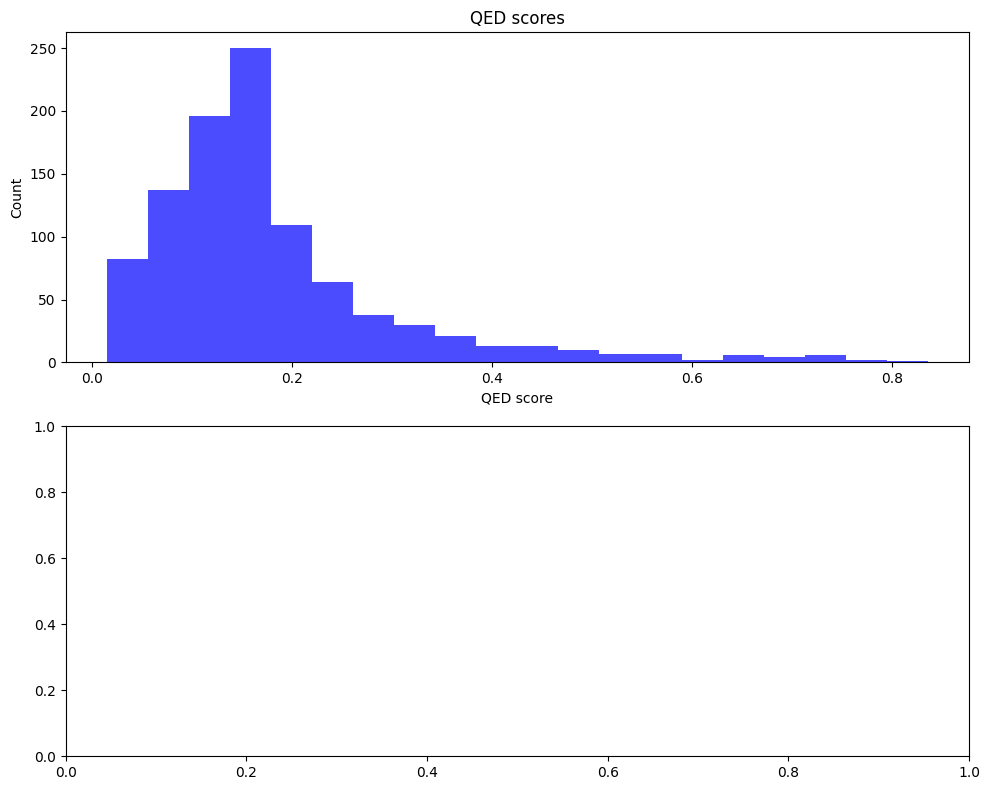

In [36]:
plot_scores(scores)

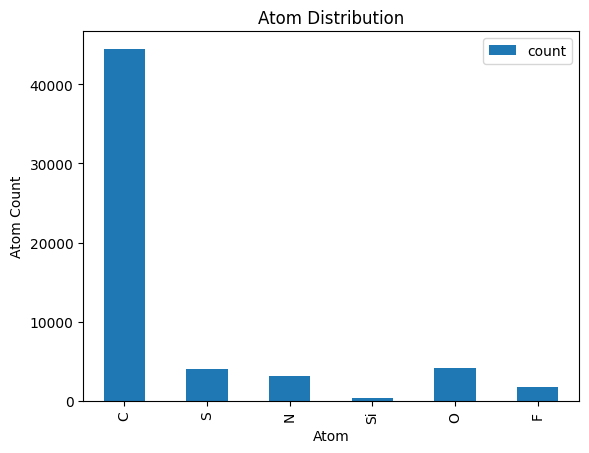

In [7]:
plot_atom_distribution_dict(valid_molecules)

In [20]:
plot_atom_distribution_dict(zinc_df['smiles'].to_list())

KeyboardInterrupt: 

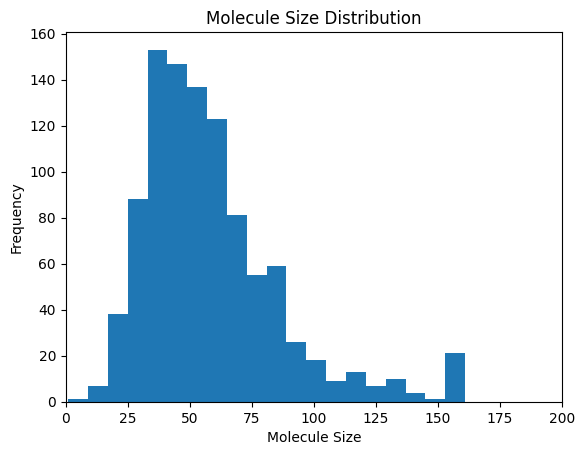

In [8]:
plot_molecule_sizes(valid_molecules)

In [9]:
def get_cycle_lengths(smiles):
    mol = Chem.MolFromSmiles(smiles)
    cycle_lengths = [len(cycle) for cycle in Chem.GetSymmSSSR(mol)]
    return cycle_lengths


df_valid = pd.DataFrame(valid_molecules, columns=['SMILES'])

df_valid['CycleLengths'] = df_valid['SMILES'].apply(get_cycle_lengths)


In [10]:
import matplotlib.pyplot as plt

# Plot histograms for cycle length in different rows of the same figure
def plot_histograms(data):
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))
    axs[0, 0].hist(data['CycleLengths'].apply(lambda x: x.count(3)), bins=20)
    axs[0, 0].set_title('Cycle Length 3')
    axs[0, 1].hist(data['CycleLengths'].apply(lambda x: x.count(4)), bins=20)
    axs[0, 1].set_title('Cycle Length 4')
    axs[1, 0].hist(data['CycleLengths'].apply(lambda x: x.count(5)), bins=20)
    axs[1, 0].set_title('Cycle Length 5')
    axs[1, 1].hist(data['CycleLengths'].apply(lambda x: x.count(6)), bins=20)
    axs[1, 1].set_title('Cycle Length 6')
    axs[2, 0].hist(data['CycleLengths'].apply(lambda x: x.count(7)), bins=20)
    axs[2, 0].set_title('Cycle Length 7')
    axs[2, 1].hist(data['CycleLengths'].apply(lambda x: x.count(8)), bins=20)
    axs[2, 1].set_title('Cycle Length 8')
    plt.show()

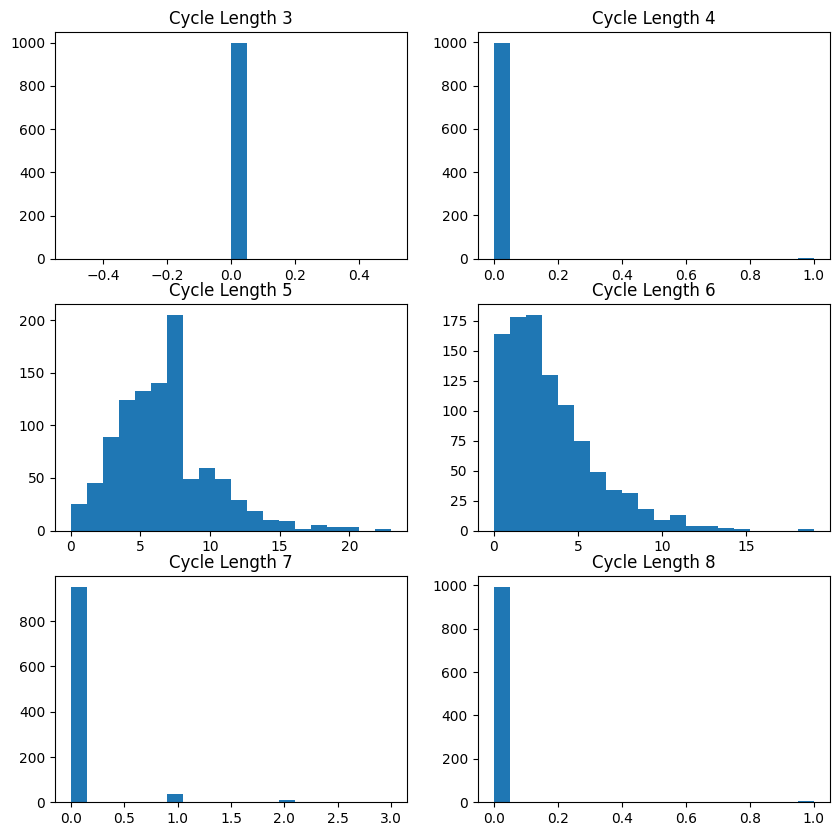

In [11]:
plot_histograms(df_valid)

In [12]:
from collections import Counter

def count_bonding_types(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Counter([bond.GetBondType() for bond in mol.GetBonds()])

C:\Users\goupi\AppData\Local\Temp\ipykernel_23372\961120245.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_valid['BondingTypes'].apply(pd.Series).fillna(0).astype(int).sum().plot.bar()


<Axes: >

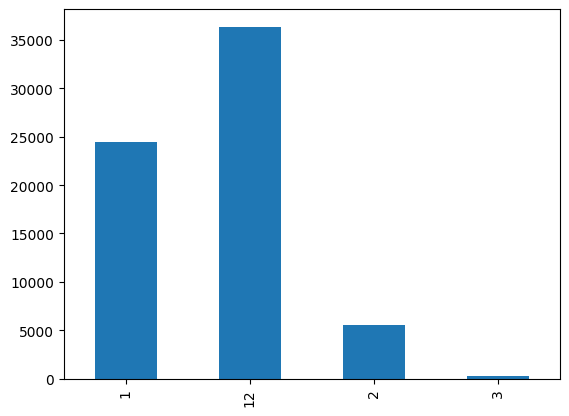

In [13]:
df_valid['BondingTypes'] = df_valid['SMILES'].apply(count_bonding_types)

#Plot 

df_valid['BondingTypes'].apply(pd.Series).fillna(0).astype(int).sum().plot.bar()